## Punto 1

In [3]:
import pandas as pd
from google.cloud import bigquery
import matplotlib.pyplot as plt

In [4]:
# Creación de archivo CSV
client = bigquery.Client()
sql = "SELECT * FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`"

df = client.query(sql).to_dataframe()
df.to_csv('Accidente_2015.csv')

## Punto 2

Como queremos saber el mayor numero de accidentes por estado (columna 'state_name') analisamos esta con las funciones de DataFrame.

In [5]:
# Con esto podemos aislar la columna de 'state_name'
df['state_name'].unique()

array(['Montana', 'Ohio', 'Utah', 'Texas', 'Oregon', 'Pennsylvania',
       'New Jersey', 'Washington', 'Kansas', 'Colorado', 'Virginia',
       'Missouri', 'Michigan', 'Alabama', 'Delaware', 'Minnesota',
       'New Mexico', 'Wyoming', 'Iowa', 'Wisconsin', 'Florida',
       'New York', 'Georgia', 'Indiana', 'Illinois', 'Kentucky',
       'California', 'North Carolina', 'South Carolina', 'Nevada',
       'Oklahoma', 'Alaska', 'Arizona', 'Tennessee', 'Arkansas',
       'Mississippi', 'Connecticut', 'Maryland', 'West Virginia',
       'Louisiana', 'North Dakota', 'Massachusetts', 'Maine',
       'South Dakota', 'Nebraska', 'Vermont', 'Rhode Island',
       'New Hampshire', 'District of Columbia', 'Idaho', 'Hawaii'],
      dtype=object)

In [6]:
# Con esto podemos tener una vista mas general de la columna a la cual estamos consultando
df['state_name'].describe()

count     32538
unique       51
top       Texas
freq       3190
Name: state_name, dtype: object

In [7]:
# Con esto podemos contar el numero de insidentes ocurridos por estado.
df['state_name'].value_counts()

Texas                   3190
California              3123
Florida                 2699
Georgia                 1329
North Carolina          1275
Pennsylvania            1102
New York                1061
Ohio                    1029
Illinois                 914
South Carolina           911
Michigan                 896
Tennessee                888
Arizona                  811
Missouri                 803
Alabama                  784
Indiana                  752
Virginia                 712
Louisiana                698
Kentucky                 694
Mississippi              604
Oklahoma                 590
Wisconsin                523
New Jersey               521
Colorado                 507
Washington               499
Arkansas                 491
Maryland                 479
Oregon                   411
Minnesota                375
Massachusetts            327
Kansas                   322
Nevada                   297
Iowa                     282
New Mexico               269
Utah          

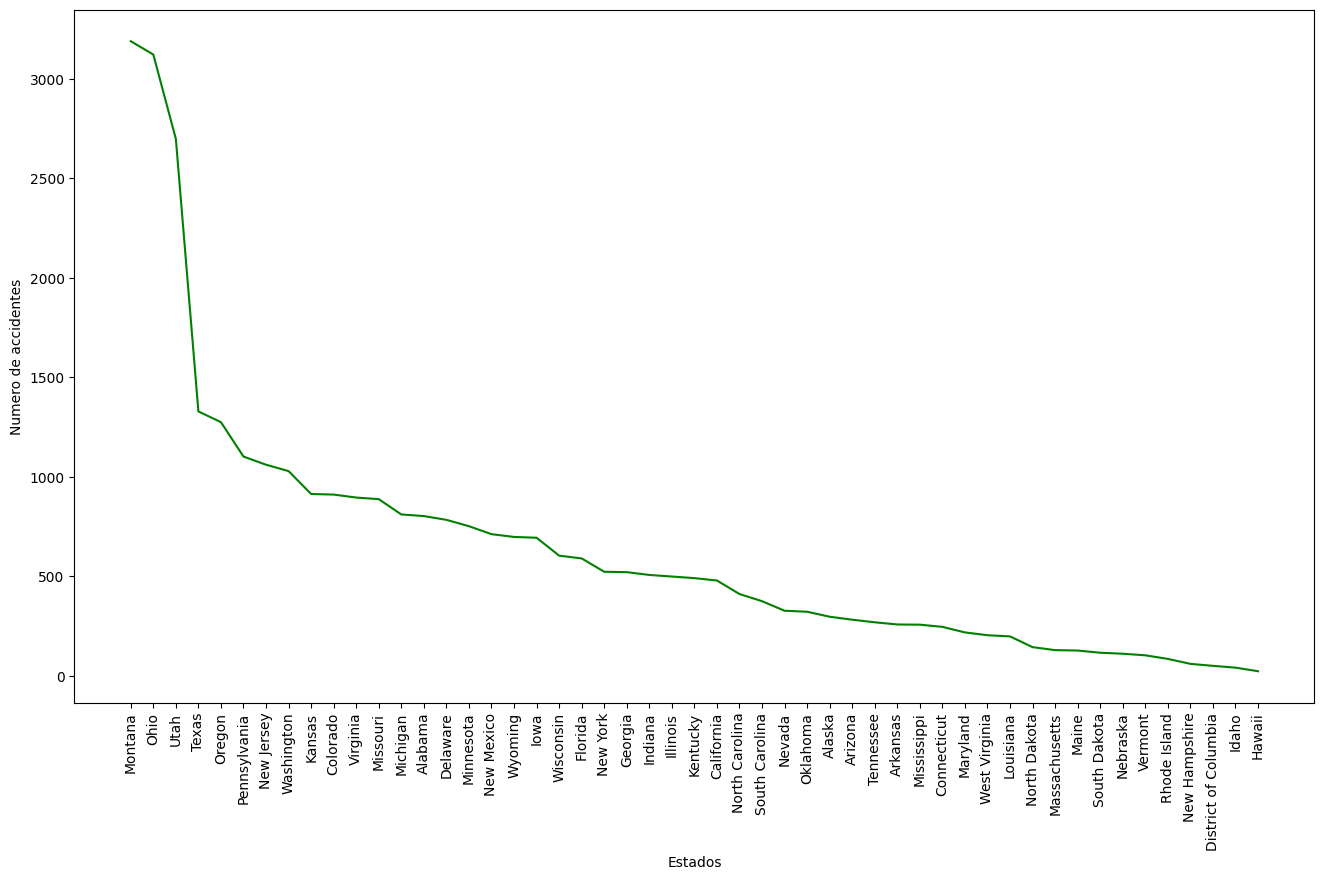

In [8]:
# Una vez obtenidos los datos, podemos graficar el numero de accidentes ocurridos en cada estado de la
# siguiente manera

plt.rcParams['figure.figsize'] = (16,9)

x = list(df['state_name'].unique())
y = list(df['state_name'].value_counts())

plt.plot( x , y , 'g' )
plt.xticks( rotation = 'vertical' )
plt.xlabel( 'Estados' )
plt.ylabel( 'Numero de accidentes' )
plt.show()


## Punto 3

## Punto 4

## Punto 5